# Analyzing COVID-19 Data
We first need to make the function that will read the COVID-19 data from the csv file.

In [1]:
def readCSVToNumpyArray(dataset):
        values = [[]]
        with open(dataset) as f:
            counter = 0
            for i in csv.reader(f):
                for j in i:
                    try:
                        values[counter].append(float(j))
                    except ValueError:
                        values[counter].append(j)
                counter = counter + 1
                values.append([])
        data = np.array(values[:-1],dtype='object')
        return data

Printing the dataset information by using `readCSVToNumpyArray`

In [2]:
import csv
from numpy import genfromtxt
from numpy import loadtxt
import numpy as np
# The below function was copied from: https://stackoverflow.com/questions/36066726/python-numpy-read-csv-into-numpy-with-proper-value-type

numpyArray = readCSVToNumpyArray('01-01-2021.csv')
print(numpyArray)
countryData = {}

[['FIPS' 'Admin2' 'Province_State' ... 'Combined_Key' 'Incident_Rate'
  'Case_Fatality_Ratio']
 ['' '' '' ... 'Afghanistan' 0.0 4.2522221790940495]
 ['' '' '' ... 'Albania' 2026.4090624782818 2.025173194320598]
 ...
 ['' '' '' ... 'Yemen' 7.0441971908506025 29.03379343169919]
 ['' '' '' ... 'Zambia' 114.21371983266279 1.857408201171596]
 ['' '' '' ... 'Zimbabwe' 94.75926242522756 2.6199943197955124]]


Printing confirmed cases, deaths, recovered, and active COVID cases per country by creating a dictionary called countryData. We are adding the country names as the keys and the sums of each country's data for the categories as the values in an array form.

In [3]:
for i in range(len(numpyArray)-1):
    countryName = numpyArray[i+1][3]
    countryData[countryName] = [0,0,0,0]
for i in range(len(numpyArray)-1):
    array = np.array(numpyArray[i+1][7:11])
    
    countryName = numpyArray[i+1][3]
    
    for j in range(len(array)):
        #isinstance returns true is specified object is specified type
        if isinstance(array[j],str):
            array[j] = 0
    countryData[countryName] = countryData[countryName] + array
print(countryData)

{'Afghanistan': array([51526.0, 2191.0, 41727.0, 0.0], dtype=object), 'Albania': array([58316.0, 1181.0, 33634.0, 23501.0], dtype=object), 'Algeria': array([99897.0, 2762.0, 67395.0, 29740.0], dtype=object), 'Andorra': array([8117.0, 84.0, 7463.0, 570.0], dtype=object), 'Angola': array([17568.0, 405.0, 11146.0, 6017.0], dtype=object), 'Antigua and Barbuda': array([159.0, 5.0, 148.0, 6.0], dtype=object), 'Argentina': array([1629594.0, 43319.0, 1426676.0, 159599.0], dtype=object), 'Armenia': array([159738.0, 2828.0, 143355.0, 13555.0], dtype=object), 'Australia': array([28460.0, 909.0, 22573.0, 1781.0], dtype=object), 'Austria': array([362911.0, 6261.0, 334901.0, 21749.0], dtype=object), 'Azerbaijan': array([219041.0, 2670.0, 188280.0, 28091.0], dtype=object), 'Bahamas': array([7887.0, 171.0, 6239.0, 1477.0], dtype=object), 'Bahrain': array([92913.0, 352.0, 90369.0, 2192.0], dtype=object), 'Bangladesh': array([514500.0, 7576.0, 458656.0, 48268.0], dtype=object), 'Barbados': array([395.0,

Printing confirmed cases, deaths, recovered, and active COVID cases per Province and State by using the same format as the code above but using the province and state data instead of country data.

In [4]:
provinceData = {}
for i in range(len(numpyArray)-1):
    ProvinceState = numpyArray[i+1][2]
    #set the values of the dictionary as 0
    provinceData[ProvinceState] = [0,0,0,0]
for i in range(len(numpyArray)-1):
    ProvinceState = numpyArray[i+1][2]
    #array for the categories' data
    array = np.array(numpyArray[i+1][7:11])
    
    for i in range(len(array)):
        if isinstance(array[i],str):
            array[j] = 0
    provinceData[ProvinceState] = provinceData[ProvinceState] + array
print(provinceData)

{'': array([25114031.0, 525820.0, 18834676.0, 5774168.0], dtype=object), 'Australian Capital Territory': array([118.0, 3.0, 114.0, 1.0], dtype=object), 'New South Wales': array([4947.0, 54.0, 0.0, 1696.0], dtype=object), 'Northern Territory': array([75.0, 0.0, 71.0, 4.0], dtype=object), 'Queensland': array([1255.0, 6.0, 1224.0, 25.0], dtype=object), 'South Australia': array([580.0, 4.0, 566.0, 10.0], dtype=object), 'Tasmania': array([234.0, 13.0, 221.0, 0.0], dtype=object), 'Victoria': array([20388.0, 820.0, 19539.0, 29.0], dtype=object), 'Western Australia': array([863.0, 9.0, 838.0, 16.0], dtype=object), 'Antwerp': array([79680.0, 0.0, 0.0, 79680.0], dtype=object), 'Brussels': array([81557.0, 0.0, 0.0, 81557.0], dtype=object), 'East Flanders': array([65260.0, 0.0, 0.0, 65260.0], dtype=object), 'Flemish Brabant': array([49270.0, 0.0, 0.0, 49270.0], dtype=object), 'Hainaut': array([102209.0, 0.0, 0.0, 102209.0], dtype=object), 'Liege': array([97027.0, 0.0, 0.0, 97027.0], dtype=object),

List countries with no cases of Novel Coronavirus (COVID-19) recovered


In [5]:
for i in range(len(numpyArray)-1):
    countryName = numpyArray[i+1][3]
    countryData[countryName] = [0,0,0,0]
for i in range(len(numpyArray)-1):
    array = np.array(numpyArray[i+1][7:11])
    
    countryName = numpyArray[i+1][3]
    
    for j in range(len(array)):
        if isinstance(array[j],str):
            array[j] = 0
    countryData[countryName] = countryData[countryName] + array
    #print(countryData[countryName][2])

# comparing the total recovered cases for each country with 0. If the country name repeats, break
    if countryData[countryName][2] == 0.0:
        print(countryName)
        if countryName == countryName:
            break

Belgium


Get the top 10 countries data Country/Region, Confirmed, Deaths, Recovered, Active, and Last Update of Novel Coronavirus (COVID-19). This uses the dictionary used in the earlier section to get the data for confirmed, deaths, recovered, and active cases of COVID-19. `dictionary1` is used to add the Last Update cases to the original data. `dictionary2` is used to have a dictionary of only the countries and the confirmed cases in order to sort the data in descending order. 

In [12]:
countryData = {}
dictionary1 = {}
dictionary2 = {}
#sortedDictionary = {}


for i in range(len(numpyArray)-1):
    countryName = numpyArray[i+1][3]
    countryData[countryName] = [0,0,0,0]

for i in range(len(numpyArray)-1):
    array = np.array(numpyArray[i+1][7:11])
    countryName = numpyArray[i+1][3]
    
    for j in range(len(array)):
        if isinstance(array[j],str):
            array[j] = 0

    countryData[countryName] = countryData[countryName] + array
    #print(countryData)

    #getting the Latest Update
    new_array = numpyArray[i+1][4]
    #print(new_array)
    newer_array = np.expand_dims(new_array, axis=0)
    #print(countryData[countryName])

    #adding the array of Latest Update values to the original countryData dictionary
    test = np.concatenate((countryData[countryName], newer_array.tolist()), axis=0)
    #print(test)
    
    #adding the array of the new array of values to the dictionary1 with countryName as the key
    dictionary1[countryName] = test

    #adding the array of just the confirmed cases to the dictionary2 with countryName as key
    #we want to sort this dictionary in terms of descending confirmed case order to get the top 10 countries
    dictionary2[countryName] = test[0]
    sortedDictionary = {}


# sorts dictionary in descending order 
# code from:https://thispointer.com/sort-a-dictionary-by-value-in-python-in-descending-ascending-order/
    sorted_dict = dict(sorted(dictionary2.items(), key = lambda item: item[1],  reverse=True))


#this will get the top 10 countries from the sorted dictionary
dictionary3 = {}
#print(type(sorted_dict))
for x in list(sorted_dict)[0:10]:
    a_list = dictionary1[x]
    dictionary3 = {x:a_list}
    print(dictionary3)



{'US': array([20215297.0, 355021.0, 0.0, 19780905.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'India': array([10286709.0, 148994.0, 9883461.0, 254254.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'Brazil': array([7700578.0, 195411.0, 6855372.0, 649795.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'Russia': array([3153960.0, 56798.0, 2553467.0, 543695.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'France': array([2697014.0, 64892.0, 200822.0, 2431300.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'United Kingdom': array([2549693.0, 74237.0, 5682.0, 2469773.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'Turkey': array([2220855.0, 21093.0, 2114760.0, 85002.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'Italy': array([2129376.0, 74621.0, 1479988.0, 574767.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'Spain': array([1928265.0, 50837.0, 150376.0, 1727052.0, '2021-01-02 05:22:33'],
      dtype=object)}
{'Germany': array([1762637.0, 34145.0, 1388744.0, 339748.0, '2021

Getting top 10 countries using `quicksort` function

In [8]:
 
# Python program for implementation of Quicksort Sort 
  
# This function takes last element as pivot, places 
# the pivot element at its correct position in sorted 
# array, and places all smaller (smaller than pivot) 
# to left of pivot and all greater elements to right 
# of pivot 
  
 
def partition(datadict, dictValue, keys, low, high): 
    i = (low-1)         # index of smaller element 
    #print(high, len(keys))
    pivot = datadict[keys[high]][dictValue]     # pivot 
    
    for j in range(low, high): 
  
        # If current element is smaller than or 
        # equal to pivot 
        if datadict[keys[j]][dictValue] <= pivot: 
  
            # increment index of smaller element 
            i = i+1
            keys[i], keys[j] = keys[j], keys[i] 
  
    keys[i+1], keys[high] = keys[high], keys[i+1] 
    return (i+1) 
  
# The main function that implements QuickSort 
# arr[] --> Array to be sorted, 
# low  --> Starting index, 
# high  --> Ending index 
  
# Function to do Quick sort 
  
  
def quickSort(dicti, dictValue, keys, low, high): 
    if len(keys) == 1: 
        return keys 
    if low < high: 
  
        # pi is partitioning index, arr[p] is now 
        # at right place 
        pi = partition(datadict,dictValue,keys, low, high) 
  
        # Separately sort elements before 
        # partition and after partition 
        quickSort(datadict,dictValue,keys, low, pi-1) 
        quickSort(datadict,dictValue,keys, pi+1, high) 
  
  
# Driver code to test above 
# dictTest = {"Percy": [1, 5], "Ari": [4, 9], "Vax":[3, 10]} 
# dictKeys = list(dictTest.keys())
# #print (dictTest.keys())
 
# quickSort(dictTest, 0, dictKeys, 0, len(dictKeys)-1)

# quickSort(arr, 0, n-1) 
#print("Sorted array is:") 
#print(dictKeys)
#print(countryData["France"])
 
# This code is contributed by Mohit Kumra 
#This code in improved by https://github.com/anushkrishnav 
countryList= list(countryData.keys())
quickSort(countryData,1,countryList,(0),(len(countryList)-1))
sortedCountries =[]
for i in range(len(countryList)-1): 
    sortedCountries.append(countryData[countryList[i]][0])
    #print(countryList[i], countryData[countryList[i]][0])

countryList.reverse()
sortedCountries.reverse()
# print(sortedCountries)
print(countryList[:10])

 

['US', 'Brazil', 'India', 'Mexico', 'Italy', 'United Kingdom', 'France', 'Russia', 'Iran', 'Spain']


Creating pie chart of top 10 countries' death

([<matplotlib.patches.Wedge at 0x7f98d1612250>,
 [Text(0.8443003609251417, 0.7050935402779376, 'US'),
  Text(-0.7500071607594049, 0.8046671726929194, 'Brazil'),
  Text(-1.0687897382410265, -0.2601701278599801, 'India'),
  Text(-0.931371987587806, -0.5852744832441782, 'Mexico'),
  Text(-0.6092284529049357, -0.91588246635202, 'Italy'),
  Text(-0.12392960115733073, -1.0929965480078083, 'United Kingdom'),
  Text(0.44428097673846645, -1.0062874408976366, 'France'),
  Text(0.7982409685962476, -0.7568430194264361, 'Russia'),
  Text(0.9790826309322265, -0.5013952550701193, 'Iran'),
  Text(1.0877256443458843, -0.16386861393302612, 'Spain')],
 [Text(0.4605274695955318, 0.38459647651523865, '22%'),
  Text(-0.4090948149596753, 0.43890936692341054, '30%'),
  Text(-0.5829762208587417, -0.1419109788327164, '4%'),
  Text(-0.5080210841388032, -0.31924062722409713, '6%'),
  Text(-0.3323064288572376, -0.499572254373829, '7%'),
  Text(-0.06759796426763494, -0.5961799352769862, '8%'),
  Text(0.242335078220

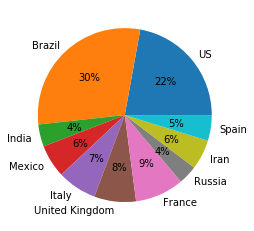

In [10]:
import matplotlib.pyplot as plt
plt.pie(sortedCountries[:10], labels = countryList[:10], autopct='%1.0f%%')

In [ ]:
import matplotlib.pyplot as plt

